# HW1-B. A weird activation function

## About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (01/02/2024)

**Requirements:**
- Python 3
- Matplotlib
- Numpy
- Pandas
- Torch
- Torchmetrics

## 0. Imports and CUDA

In [12]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
# Numpy
import numpy as np
# Pandas
import pandas as pd
# Torch
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchmetrics.classification import BinaryAccuracy
# Helper functions (additional file)
from helper_functions import *
#from hidden_functions import *

In [13]:
# Use GPU if available, else use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


## 4. Writing a custom activation function

In this section, we will consider a weird activation function $ f(x) $, whose behavior is decribed as:

$$ f(x) = ReLU(x) - a \times ReLU(-x) $$

Where $ ReLU(x) $ stands for the Rectified Linear Unit activiation function introduced in class as $ ReLU(x) = max(0, x) $. The coefficient $ a $ is a trainable parameter, whose  value will be set to $ 0.2 $ upon initializing the activation layer. This value may later be modified during training.

**Question 7:** Is this a valid activation function to use? Is it technically possible to have a trainable parameter in an activation function?


**Question 8:** In the code below, we will define a *WeirdActivation* object, implementing our activation function. As before, there are a few *None* variables that probably need to be replaced. Show your code for the *WeirdActivation* object in your report. You should probably use the *torch.relu(x)* function in your implementation.

In [22]:
class WeirdActivation(torch.nn.Module):
    def __init__(self, a, device):
        super().__init__()
        self.a = nn.Parameter(torch.tensor([a], dtype = torch.float64, device = device, requires_grad = True))

    def forward(self, x):
        relu= nn.ReLU()
        x= relu(x)-self.a*(relu(-x))
        return x

You may use the fucntion *test_act_oject()* below, which will produce a few test cases for your *WeirdActivation* object. As before, if you have correctly figured out the code to use in Question 8, you will be able to pass all test cases.

In [23]:
# Define our weird activation function
act_fun = WeirdActivation(a = 0.2, device = device)

In [25]:
# Running test function for our activation function object
test_act_oject(act_fun, device)

--- Test case (activation function): Checking for correct forward method.
Testing forward on a Tensor of values.
[[1.0], [-0.2], [0.0]]
Retrieved: [[1.0], [-0.2], [0.0]]
Expected: [[1.0], [-0.2], [0.0]]
Test case: Passed


The code below will display four curves, corresponding to the four different curves produced by our *WeirdActivation* function for four different values of a.

**Question 9:** How would you describe this *WeirdActivation* function? Does it resemble to another activation function we have discussed in class?



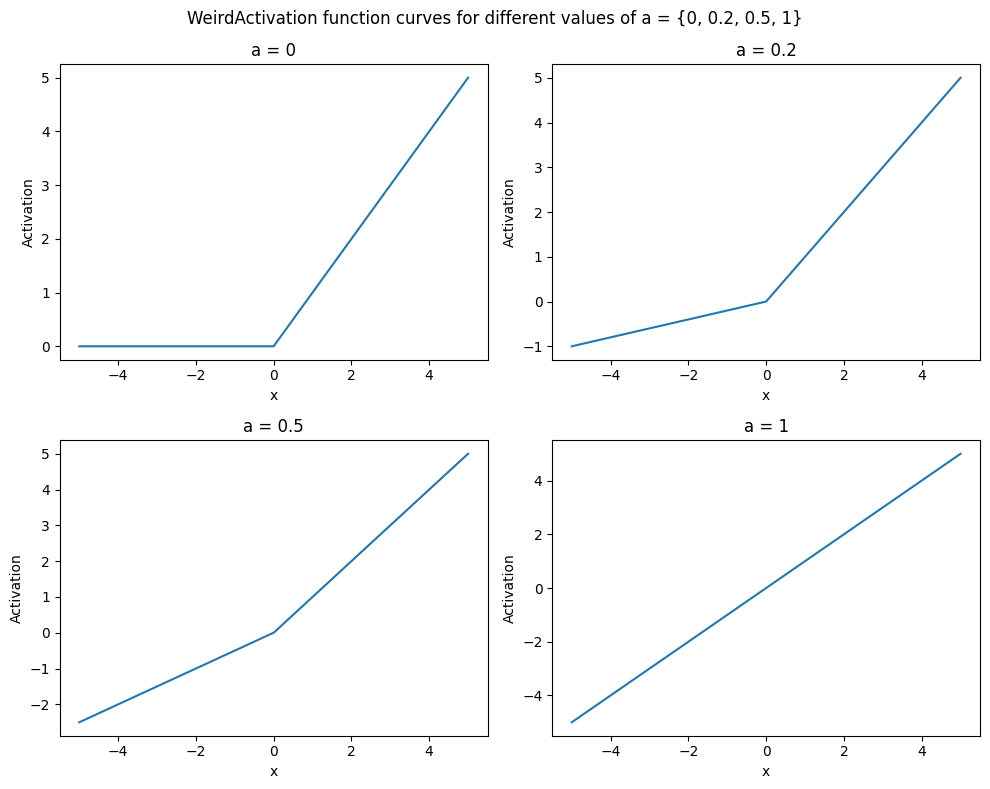

In [26]:
# Check activation curves
check_activation_curves(WeirdActivation, device)

## What is next?

Our task continues in the Notebook 1-C.